Name: Liangfan Pang | CWID: 10453333

## 1. Plot the data

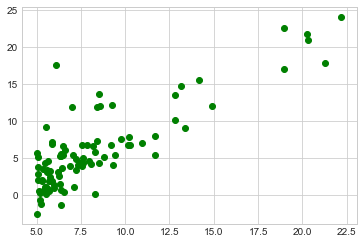

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid') 
data = np.loadtxt("data2.txt",delimiter=",")
x = data[:, 0]
y = data[:, 1]
plt.plot(x,y,'go')

-----

## 2. Find the coefficients using Normal Equation

In [6]:
import numpy as np
def normalequation(X, y):
    X_b = np.c_[np.ones(len(data)), X]
    sigma = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return sigma

sigma = normalequation(data[:, 0], data[:, 1])
print(sigma)

[-3.89578088  1.19303364]


----

## 3. Gradient Descent

### 1) Using batch mode

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in subtract


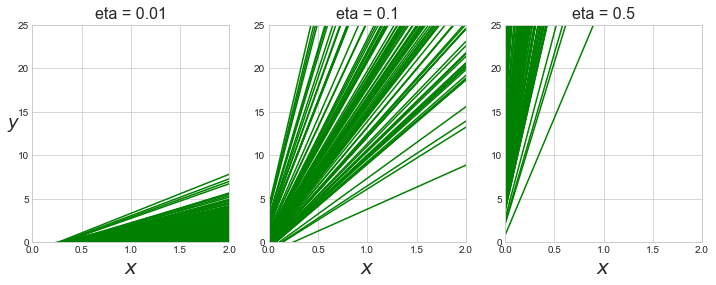

[[-1.75118775]
 [-0.42959835]]


In [51]:
eta = 0.001
n_iterations = 50
m = 100
theta = np.random.randn(2,1)
X_new = np.array([[0],[2]])
X_new_b =np.c_[np.ones((2,1)), X_new]
theta_path_bgd = []
data = np.loadtxt("data2.txt",delimiter=",")
X = data[:,0]
y = data[:,1]
X_b = np.c_[np.ones(len(data)), X]

for iteration in range(n_iterations):
    gradients = 2/m *X_b.T.dot(X_b.dot(theta)-y)
    theta = theta -eta*gradients
    
def plot_gradient_descent(theta, eta, theta_path = None):
    X_b = np.c_[np.ones(len(data)), X]
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_iterations = 500
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'g-' if iteration > 0 else 'r-'
            plt.plot(X_new, y_predict, style)
        gradients = 2/ m* X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta*gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('$x$', fontsize=20)
    plt.axis([0,2,0,25])
    plt.title('eta = '+format(eta), fontsize = 16)
    
np.random.seed(97)
theta = np.random.randn(2,1)

X = data[:, 0]
y = data[:, 1]
plt.figure(figsize = (12,4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.01)
plt.ylabel('$y$', rotation = 0, fontsize = 18)
plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path = theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)
    
plt.show()
print(theta)

### 2) Using Stochastic mode

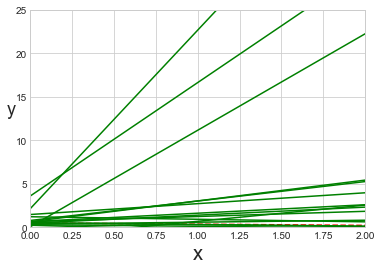

[[-3.88171819]
 [ 1.1862821 ]]


In [52]:
theta_path_sgd = []
X_b = np.c_[np.ones(len(data)), X]
m = len(X_b)
np.random.seed(42)

n_epochs = 1000
t0,t1 = 3,3

def learning_schedule(t):
    return t0/(t +t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = 'g-' if i>0 else 'r--'
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta *gradients
        theta_path_sgd.append(theta)

X = [1, 4]
y = [3.05, 8.80]
plt.plot(X, y, 'go')
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', rotation = 0, fontsize = 18)
plt.axis([0,2,0,25])
plt.show()
print(theta)

-----

a) A given number of iterations: 500

b) According to this result of theta, the stochastic mode is more accurate. But in general, the batch gradient descent has more stable accuracy than stochastic gradient descent, and the stochastic gradient descent always gets result faster.

c) No, there is not an overfitting.

d) the best learning rate is: 

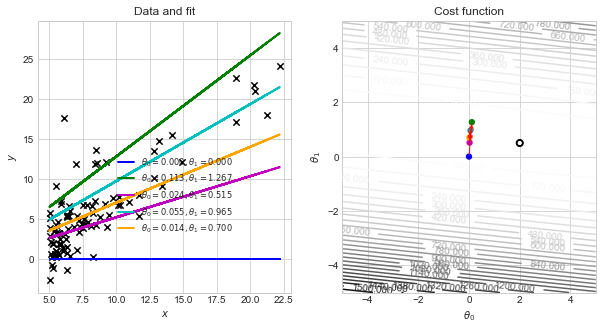

In [71]:
import numpy as np
import matplotlib.pyplot as plt

m = 50
x = data[:,0]
y = data[:,1]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta0, theta1):
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    return theta0 + theta1*x

J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                   theta1_grid[:,np.newaxis,np.newaxis])

X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax[1].contour(X, Y, J_grid, 30)
ax[1].clabel(contours)

ax[1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

N = 5
alpha = 0.01
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))

colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(1,N):
    ax[1].annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, *theta[j]), color=colors[j], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
ax[1].scatter(*zip(*theta), c=colors, s=40, lw=0)

# Labels, titles and a legend.
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
axbox = ax[0].get_position()

ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height),
             fontsize='small')

plt.show()